# WEEK 1 INTRODUCTION TO ALGORITHM ANALYSIS

We are going to have a peak at a few different sorting algorithms to see how long they take to run.

## Step 1 Init
First we will start by importing some libraries and initializing some variables.  Don't worry if you don't understand this syntax, or how to use these libraries, they are for illustrative purposes only (for the moment).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import sys

MIN_SAMPLE_SIZE = 100
MAX_SAMPLE_SIZE = 100000
NUM_SAMPLES = 100

sample_sizes = np.linspace(MIN_SAMPLE_SIZE,
                           MAX_SAMPLE_SIZE,
                           NUM_SAMPLES,
                           dtype='int')

# THIS MAY TAKE SOME TIME ON SLOWER MACHINES YOU CAN REDUZE THE NUMBER OF SAMPLES OR SAMPLE SIZE ABOVE
samples = []
for sample_size in sample_sizes:
    samples.append([random.randint(1, 100) for i in range(0, sample_size)])


print(sample_sizes)



[   100   1109   2118   3127   4136   5145   6154   7163   8172   9181
  10190  11200  12209  13218  14227  15236  16245  17254  18263  19272
  20281  21290  22300  23309  24318  25327  26336  27345  28354  29363
  30372  31381  32390  33400  34409  35418  36427  37436  38445  39454
  40463  41472  42481  43490  44500  45509  46518  47527  48536  49545
  50554  51563  52572  53581  54590  55600  56609  57618  58627  59636
  60645  61654  62663  63672  64681  65690  66700  67709  68718  69727
  70736  71745  72754  73763  74772  75781  76790  77800  78809  79818
  80827  81836  82845  83854  84863  85872  86881  87890  88900  89909
  90918  91927  92936  93945  94954  95963  96972  97981  98990 100000]


## Step 2 More init
Just defining a few of the functions and algorithms.  We won't go over them step by step, but I'll very quickly explain them.

In [16]:
def array_reverse(input_list):
    """
    Reverses the elements of the list to demonstrate a linear algorithm of reversing an array of things.

    :param input_list A list of objects to be reversed.
    :return A returned version/copy of the list..
    """

    array_len = len(input_list)

    i = 0;

    output_list = [None] * array_len

    while i < array_len:
        output_list[i] = input_list[array_len-1 - i]
        i += 1

    return output_list


In [17]:
def bubble_sort(input_list):
    for i in range(0, len(input_list)):
        for j in range(i+1, len(input_list)):
            if input_list[i] > input_list[j]:
                tmp = input_list[i]
                input_list[i] = input_list[j]
                input_list[j] = tmp

    return input_list


In [18]:
def merge_sort(input_list):
    if len(input_list) > 1:
        split = len(input_list) // 2
        left = input_list[:split]
        right = input_list[split:]
        left = merge_sort(left)
        right = merge_sort(right)

        output = []
        left_index = 0
        right_index = 0
        inst_c = 0
        while left_index < len(left) and right_index < len(right):
            inst_c += 1
            if left[left_index] < right[right_index]:
                output.append(left[left_index])
                left_index += 1
            else:
                output.append(right[right_index])
                right_index += 1

        while left_index < len(left):
            output.append((left[left_index]))
            left_index += 1

        while right_index < len(right):
            output.append(right[right_index])
            right_index += 1

        return output
    return input_list


In [19]:
def draw_plot(x, y, title="My Cool Chart"):
    plt.ylabel("Steps to Complete")
    plt.xlabel("Input Size")
    plt.title(title)
    plt.ylim(0, max(y)*1.05)
    plt.plot(x , y, linestyle='--', marker='o')
    plt.show()


## Step 3 Now we are just going to time a few of these algorithms for different sample sizes and plot them to see how long they take!

### 3a.   Array Reversal

In [21]:
runtimes = []
tot_start = time.perf_counter()
for sample in samples:
    start = time.perf_counter()
    r = array_reverse(sample)
    duration_seconds = time.perf_counter() - start
    runtimes.append(duration_seconds)
    print(f"Reversed the {len(sample)} element array in {duration_seconds:.2f} seconds.", end="\r")

tot_duration_seconds = time.perf_counter() - tot_start
print(f"\n\nTest Complete, Total Duration: {tot_duration_seconds:.2f} seconds.")

Reversed the 100000 element array in 0.02 seconds.

Test Complete, Total Duration: 0.89 seconds.


The blow plot shows that the growh of this is pretty much a straight line.  We would consider this a "linear" algorithm or O(n)

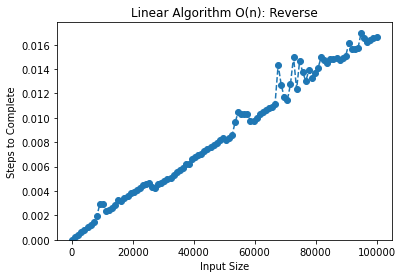

In [22]:
draw_plot(sample_sizes, runtimes, "Linear Algorithm O(n): Reverse")

### 3b.  Merge Sort

In [23]:
runtimes = []
tot_start = time.perf_counter()
for sample in samples:
    start = time.perf_counter()
    r = merge_sort(sample)
    duration_seconds = time.perf_counter() - start
    runtimes.append(duration_seconds)
    print(f"Merge Sorted the {len(sample)} element array in {duration_seconds:.2f} seconds.", end="\r")

tot_duration_seconds = time.perf_counter() - start
print(f"\n\nTest Complete, Total Duration: {tot_duration_seconds:.2f} seconds.")

Merge Sorted the 100000 element array in 0.57 seconds.

Test Complete, Total Duration: 0.57 seconds.


Depending on your PC, this sort may look linear, but should start to curve upward just slightly.  This is O(n*ln(n))

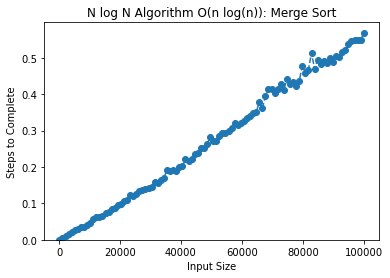

In [24]:
draw_plot(sample_sizes, runtimes, "N log N Algorithm O(n log(n)): Merge Sort")

## 3c.  Bubble Sort
This is a pretty slow algorithm, so i'm only going to run the first 10 examples.

In [33]:
runtimes = []
tot_start = time.perf_counter()
for sample in samples[0:10]:
    start = time.perf_counter()
    r = bubble_sort(sample)
    duration_seconds = time.perf_counter() - start
    runtimes.append(duration_seconds)
    print(f"Bubble Sorted the {len(sample)} element array in {duration_seconds:.2f} seconds.", end="\r")

tot_duration_seconds = time.perf_counter()
print(f"\n\nTest Complete, Total Duration: {tot_duration_seconds:.2f} seconds.")

Bubble Sort the 9181 element array in 3.44 seconds.

Test Complete, Total Duration: 3.44 seconds.


As you can see i the chart below, the time it takes to sort larger and larger lists wiht bubble sort grows exponentially.  This is Polynomial time.  And once N starts getting even in the 10s of thousands, the program starts to run extremely slow.

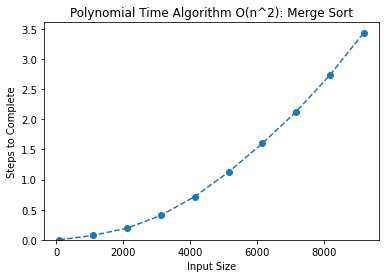

In [39]:
draw_plot(sample_sizes[0:10], runtimes, "Polynomial Time Algorithm O(n^2): Merge Sort")


Try some of your own algorithms and see how fast they run!